# [CDAF] Atividade 1

## Nome e matrícula
Nome: Thiago Pádua de Carvalho

Matrícula: 2020007066

## Introdução
Nesta atividade, vamos revisar os conceitos aprendidos em sala de aula sobre aleatoriedade e previsão, trabalhando em cima do dataset do Soccer Prediction Challenge, disponível no Moodle.

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

## Questão 1
- Carregue o dataset 'TrainingSet_2023_02_08'
- Crie um histograma para a quantidade de gols marcados por jogo do time da casa, do time fora, de gols totais e da diferença de gols por partida.
- Caso hajam instâncias com valores nitidamente errados, destaque-os e remova-os antes de gerar os histogramas.
- Calcule o mínimo, o máximo e a média de cada um dos 4 histogramas solicitados acima.

In [3]:
df = pd.read_excel("data/TrainingSet_2023_02_08.xlsx", sheet_name=0)

df = df[df['HS'] >= 0]  # Keeps only line where number of goals (home or away) are non negative
df = df[df['AS'] >= 0]
df.head()


,Sea,Lge,Date,HT,AT,HS,AS,GD,WDL
0,00-01,GER1,11/08/2000,Dortmund,Hansa Rostock,1,0,1,W
1,00-01,GER1,12/08/2000,Bayern Munich,Hertha Berlin,4,1,3,W
2,00-01,GER1,12/08/2000,Freiburg,VfB Stuttgart,4,0,4,W
3,00-01,GER1,12/08/2000,Hamburger SV,Munich 1860,2,2,0,D
4,00-01,GER1,12/08/2000,Kaiserslautern,Bochum,0,1,-1,L


In [12]:
def plot_and_show_measures(dataframe, title, xlabel='', ylabel=''):
    max_value = np.max(dataframe)
    min_value = np.min(dataframe)
    mean_value = np.mean(dataframe)

    # Configurar os parâmetros do histograma
    bin_width = 0.5
    bin_range = (min_value, max_value)

    # Calcular os intervalos do histograma
    bins = np.arange(bin_range[0], bin_range[1] + bin_width, bin_width)
    
    plt.hist(dataframe, color='purple', bins=bins)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

    print(f"Maximum number of goals: {max_value}\nMinimum number of goals: {min_value}\nMean number of goals: {mean_value}")

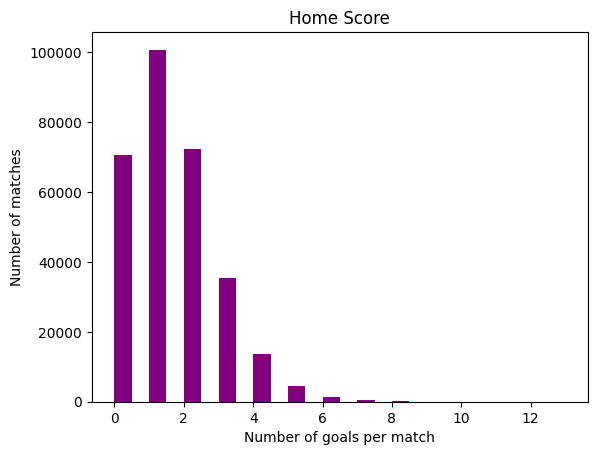

Maximum number of goals: 13
Minimum number of goals: 0
Mean number of goals: 1.471700194179949


In [13]:
goals_home = df['HS']
plot_and_show_measures(goals_home, 'Home Score', 'Number of goals per match', 'Number of matches')

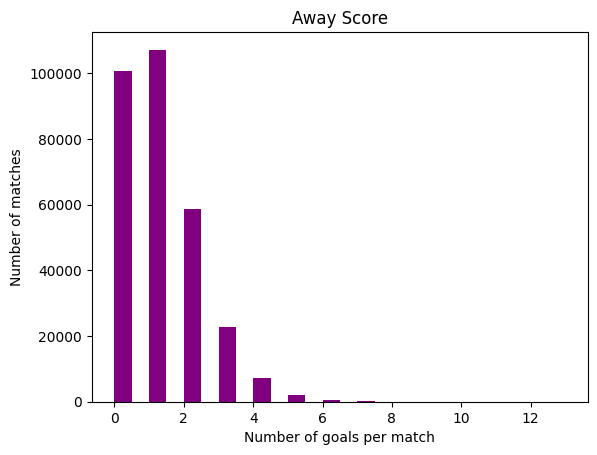

Maximum number of goals: 13
Minimum number of goals: 0
Mean number of goals: 1.1214410090673013


In [14]:
goals_away = df['AS']
plot_and_show_measures(goals_away, 'Away Score', 'Number of goals per match', 'Number of matches')

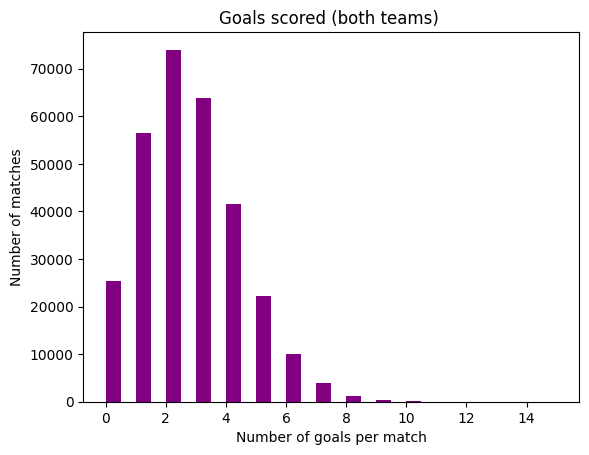

Maximum number of goals: 15
Minimum number of goals: 0
Mean number of goals: 2.5931412032472503


In [15]:
goals_total = goals_home + goals_away

plot_and_show_measures(goals_total, 'Goals scored (both teams) ', 'Number of goals per match', 'Number of matches')

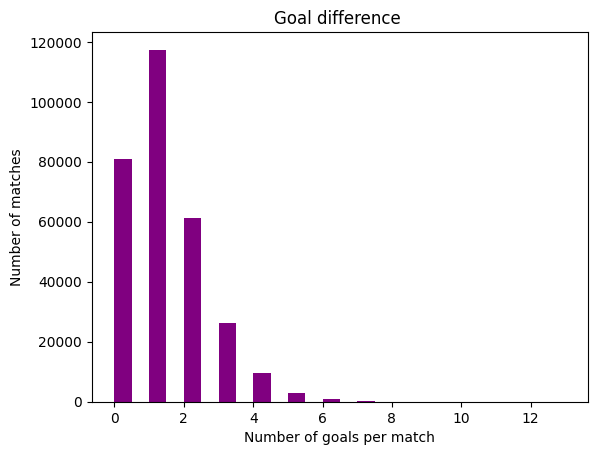

Maximum number of goals: 13
Minimum number of goals: 0
Mean number of goals: 1.2660332144635653


In [16]:
goals_diff = abs(df['GD'])
plot_and_show_measures(goals_diff, 'Goal difference ', 'Number of goals per match', 'Number of matches')

## Questão 2
- Escolha uma temporada que já terminou, de alguma das ligas presentes no dataset.
- Realize os mesmos histogramas da questão 1, mas agora para a temporada escolhida.
- Quais as diferenças entre os histogramas da questão 1 e da questão 2? O que isso pode indicar sobre a qualidade ofensiva da liga escolhida vs. o todo?

A temporada escolhida foi a da liga italiana de 2008.

In [57]:
italian_league_0708 = df.loc[(df['Lge'] ==  'ITA1') & (df['Sea'] == '07-08')]
italian_league_0708.reset_index(inplace=True, drop=True)
italian_league_0708.head()

,Sea,Lge,Date,HT,AT,HS,AS,GD,WDL
0,07-08,ITA1,25/08/2007,Juventus,Livorno,5,1,4,W
1,07-08,ITA1,25/08/2007,Lazio,Torino,2,2,0,D
2,07-08,ITA1,26/08/2007,Fiorentina,Empoli,3,1,2,W
3,07-08,ITA1,26/08/2007,Genoa,AC Milan,0,3,-3,L
4,07-08,ITA1,26/08/2007,Internazionale Milano,Udinese,1,1,0,D


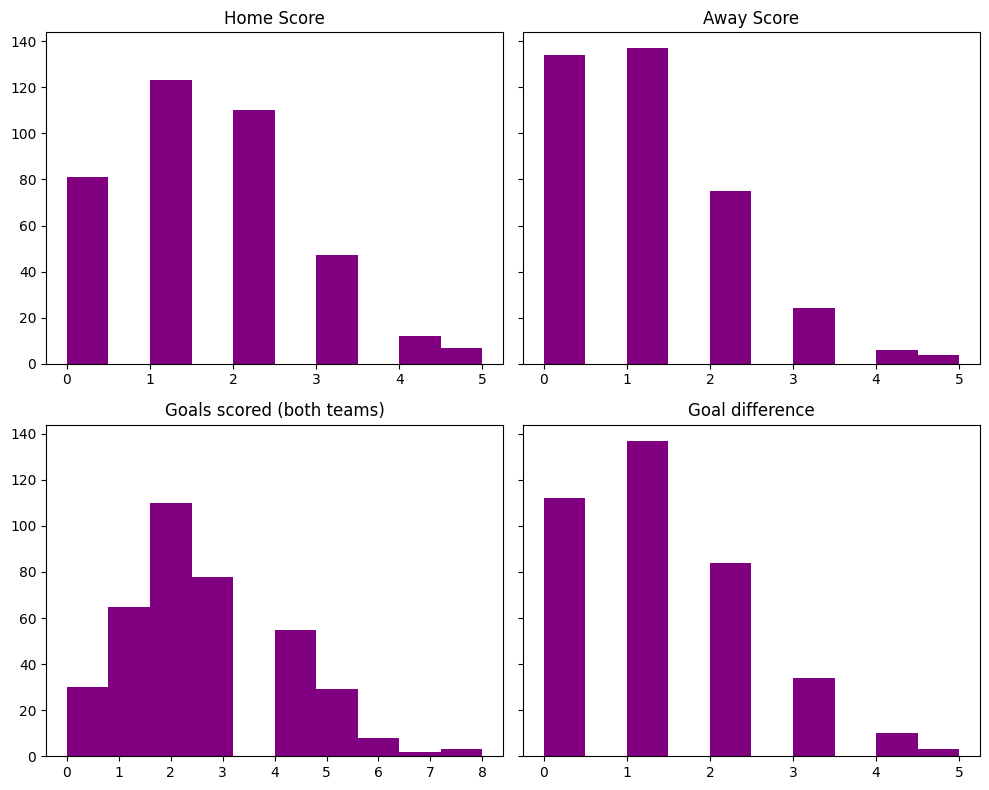

In [18]:
"""bin_width = 0.5
bin_range = (np.mix(), np.max())

# Calcular os intervalos do histograma
bins = np.arange(bin_range[0], bin_range[1] + bin_width, bin_width)"""

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 8), sharey=True)
goals_diff_ita1_0708 = abs(italian_league_0708['GD'])

axs[0, 0].hist(italian_league_0708['HS'], color='purple')
axs[0, 0].set_title('Home Score')

axs[0, 1].hist(italian_league_0708['AS'], color='purple')
axs[0, 1].set_title('Away Score')

axs[1, 0].hist(italian_league_0708['HS'] + italian_league_0708['AS'], color='purple')
axs[1, 0].set_title('Goals scored (both teams)')

axs[1, 1].hist(goals_diff_ita1_0708, color='purple')
axs[1, 1].set_title('Goal difference')

plt.tight_layout()
plt.show()


Os histogramas da serie A de 2008 mostram que esta acompanha de perto a tendência observada nos dados gerais de ligas. Pode-se observar um menor número de ocorrência de zero gols marcados por ambas as equipes. Essa diferença, no entanto, não traduz por si só uma maior ofensividade.

É possível verificar que o time da casa goleia mais, com 2 sendo relativamente mais próximo de 1. Além disso, é notável que a liga italiana acompanha a tendência geral de gols fora de casa, com concentração maior em 0 ou 1 gol, caindo gradativamente daí em diante. A diferença de gols conta com mais aparições de 0, indicando que há mais empates.

Conclui-se que, com ligeiras assimetrias, a serie A de 2007/2008 tem dados que representam bem o caso geral das ligas presentes no dataframe.

## Questão 3
- À partir dos dados do campeonato em selecionado, crie um dataframe que corresponda à tabela de classificação ao fim da temporada contendo o nome dos times, nº de pontos, jogos, vitórias, empates, derrotas, gols pró, gols contra e saldo de gols. Ordena a classificação por pontos, vitórias, saldo de gols e gols pró.
- Faça o mesmo para apenas para a primeira metade de jogos.

In [141]:
# Series that will compose the dataframe
def create_table(dataframe):
    teams = pd.Series(dataframe['HT'].unique(), name='Team')
    num_of_teams = teams.count()
    
    points = pd.Series(np.zeros(num_of_teams, dtype=int), name='Points')
    played = pd.Series(np.zeros(num_of_teams, dtype=int), name='Played')
    won = pd.Series(np.zeros(num_of_teams, dtype=int), name='Won')
    drawn = pd.Series(np.zeros(num_of_teams, dtype=int), name='Drawn')
    lost = pd.Series(np.zeros(num_of_teams, dtype=int), name='Lost')
    goals_for = pd.Series(np.zeros(num_of_teams, dtype=int), name='Goals For')
    goals_against = pd.Series(np.zeros(num_of_teams, dtype=int), name='Goals Against')
    goal_difference = pd.Series(np.zeros(num_of_teams, dtype=int), name='Goal Difference')

    return pd.concat([teams, points, played, won, drawn, lost, goals_for, goals_against, goal_difference], axis=1)

In [142]:
def mount_classification_table(league, table, num_of_matches):
    for i in range(num_of_matches):
        # This if block determines how many points the teams have scores in the determined number of matches
        # and number of W/D/L
        if league.iloc[i]['GD'] > 0:
            table.loc[(table['Team'] == league.iloc[i]['HT']), 'Points'] += 3
            table.loc[(table['Team'] == league.iloc[i]['HT']), 'Won'] += 1
            table.loc[(table['Team'] == league.iloc[i]['AT']), 'Lost'] += 1

        elif league.iloc[i]['GD'] < 0:
            table.loc[(table['Team'] == league.iloc[i]['AT']), 'Points'] += 3
            table.loc[(table['Team'] == league.iloc[i]['HT']), 'Lost'] += 1
            table.loc[(table['Team'] == league.iloc[i]['AT']), 'Won'] += 1
        else:
            table.loc[(table['Team'] == league.iloc[i]['HT']), 'Points'] += 1
            table.loc[(table['Team'] == league.iloc[i]['AT']), 'Points'] += 1
            table.loc[(table['Team'] == league.iloc[i]['HT']), 'Drawn'] += 1
            table.loc[(table['Team'] == league.iloc[i]['AT']), 'Drawn'] += 1
        
        # Matches played
        table.loc[(table['Team'] == league.iloc[i]['HT']), 'Played'] += 1
        table.loc[(table['Team'] == league.iloc[i]['AT']), 'Played'] += 1

        # Goals For
        home_score = league.iloc[i]['HS']
        away_score = league.iloc[i]['AS']
        table.loc[(table['Team'] == league.iloc[i]['HT']), 'Goals For'] += home_score
        table.loc[(table['Team'] == league.iloc[i]['AT']), 'Goals For'] += away_score

        # Goals Against
        table.loc[(table['Team'] == league.iloc[i]['HT']), 'Goals Against'] += away_score
        table.loc[(table['Team'] == league.iloc[i]['AT']), 'Goals Against'] += home_score

        # Goal Difference
        table.loc[(table['Team'] == league.iloc[i]['HT']), 'Goal Difference'] += (home_score - away_score)
        table.loc[(table['Team'] == league.iloc[i]['AT']), 'Goal Difference'] += -(home_score - away_score)


    table.sort_values(['Points','Won', 'Goal Difference', 'Goals For'], ascending=False, inplace=True)
    table.index = np.arange(1, 21)
    return table

In [143]:
def create_and_mount_table(league, num_of_matches=380):
    table = create_table(league)
    table = mount_classification_table(italian_league_0708, table, num_of_matches)
    return table

In [144]:
ita1_table = create_and_mount_table(italian_league_0708)
display(ita1_table)

,Team,Points,Played,Won,Drawn,Lost,Goals For,Goals Against,Goal Difference
1,Internazionale Milano,85,38,25,10,3,69,26,43
2,Roma,82,38,24,10,4,72,37,35
3,Juventus,72,38,20,12,6,72,37,35
4,Fiorentina,66,38,19,9,10,55,39,16
5,AC Milan,64,38,18,10,10,66,38,28
6,Sampdoria,60,38,17,9,12,56,46,10
7,Udinese,57,38,16,9,13,48,53,-5
8,Napoli,50,38,14,8,16,50,53,-3
9,Genoa,48,38,13,9,16,44,52,-8
10,Atalanta,48,38,12,12,14,52,56,-4


## Questão 4
- Utilizando os jogos da liga escolhida, use regressão de Poisson para criar um modelo de previsão de resultados, como visto nos slides em sala e no Soccermatics.
-- https://soccermatics.readthedocs.io/en/latest/gallery/lesson5/plot_SimulateMatches.html
- Dê print no sumário do ajuste
- Simule a partida entre o 1º e o 4º colocado, onde o 1º joga em casa. Primeiro, apresente a quantidade esperada de gols de cada time. Em seguida, apresente um histograma com a probabilidade de diferentes placares entre os times.

## Questão 5
- Utilize o modelo treinado para simular os placares esperados de todos os jogos da temporada.
- Construa uma tabela de classificação em cima dos resultados esperados. Considere que jogos com uma diferença esperada de gols < 0.5 é um empate.
- Compare a tabela real com a simulada. Onde estão as principais diferenças entre elas? E similaridades? O que isso pode indicar em termos de o que modelo subestima e superestima sobre a qualidade dos times?